In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading yearly data

In [2]:
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv') #yearly data

# calculating proportion_deaths for yearly 

In [3]:
yearly["proportion_deaths"]= yearly['deaths']/yearly['births']

# data head, info, description

In [4]:
yearly.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [5]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               12 non-null     int64  
 1   births             12 non-null     int64  
 2   deaths             12 non-null     int64  
 3   clinic             12 non-null     object 
 4   proportion_deaths  12 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 608.0+ bytes


In [6]:
yearly.describe()

,year,births,deaths,proportion_deaths
count,12.000000,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333,0.069453
std,1.783765,449.078476,145.383089,0.040489
min,1841.000000,2442.000000,66.000000,0.020364
25%,1842.000000,2901.750000,100.250000,0.033405
50%,1843.500000,3108.500000,219.500000,0.072492
75%,1845.000000,3338.250000,263.500000,0.084153
max,1846.000000,4010.000000,518.000000,0.157591


# data extraction form yearly data

In [7]:
yearly1= yearly[yearly['clinic']=='clinic 1']
yearly2= yearly[yearly['clinic']=='clinic 2']

# data visualization of yearly data

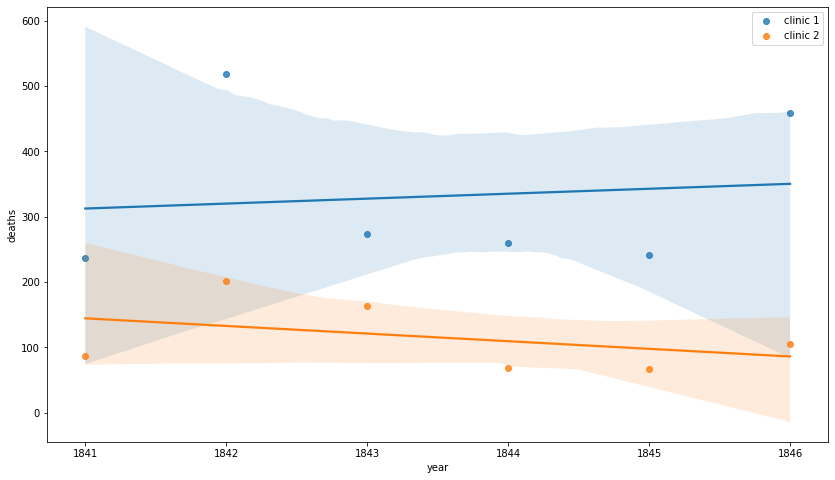

In [8]:
plt.figure(figsize=(14,8))
sns.regplot(x='year',y='deaths',data=yearly1,label= "clinic 1")
sns.regplot(x='year',y='deaths',data=yearly2,label='clinic 2')
plt.legend()

### From this regplot, we can see that for clinic 1, the postive slop of death with respect to year, and for clinic 2, the slope is negative.
### It means the death rate in clinic 2 is way lesser than clinic 1

# Hand washing begin
# reading monthly data

In [9]:
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date']) #monthly data

# calculating proportion_deaths for monthly data

In [10]:
monthly["proportion_deaths"]= monthly['deaths']/monthly['births']

# data head, info, description for monthly data

In [11]:
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [12]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               98 non-null     datetime64[ns]
 1   births             98 non-null     int64         
 2   deaths             98 non-null     int64         
 3   proportion_deaths  98 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.2 KB


In [13]:
monthly.describe()

,births,deaths,proportion_deaths
count,98.000000,98.000000,98.000000
mean,267.000000,22.469388,0.086203
std,41.769372,18.141031,0.071818
min,190.000000,0.000000,0.000000
25%,242.500000,8.000000,0.029100
50%,264.000000,16.500000,0.062211
75%,292.750000,36.750000,0.133185
max,406.000000,75.000000,0.313808


# data visualization for monthly data

Text(0, 0.5, 'Proportion deaths')

<Figure size 720x720 with 0 Axes>

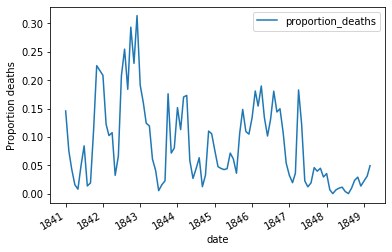

In [14]:
#fig =  plt.figure()
plt.figure(figsize=(10,10))
monthly.plot('date','proportion_deaths')
plt.ylabel('Proportion deaths')

### this plot is presenting the death with respect to date

# before and after washing hands

In [41]:
handWashing_start= pd.to_datetime('1847-06-01') # hand washing began from 1847-06-01

In [42]:
before_washing = monthly[monthly["date"] < handWashing_start]
after_washing=monthly[monthly['date']>= handWashing_start]

# visualization of Proportion deaths vs date for before_washing and after_washing

Text(0, 0.5, 'Proportion deaths')

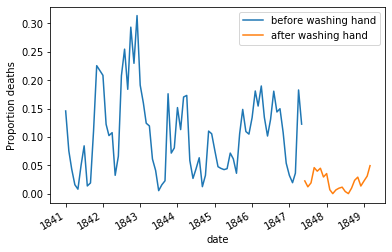

In [43]:
ax = before_washing.plot(x="date",y="proportion_deaths",label = "before washing hand")
after_washing.plot(x="date",y="proportion_deaths",label="after washing hand",ax=ax)
ax.set_ylabel("Proportion deaths")

### from this plot, it is clear that after hand washing, the death rate decreesd

#  average reduction in proportion of deaths due to handwashing

In [31]:
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths
mean_diff = after_proportion.mean() - before_proportion.mean() 

In [32]:
print(" difference in mean monthly proportion of deaths",mean_diff)

 difference in mean monthly proportion of deaths -0.0839566075118334


# More handwashing, fewer deaths?
### this clear that hand washing reduce the death rate significantly 

# bootstrap analysis

In [46]:
from numpy import percentile

In [35]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [38]:
confidence_interval=pd.Series(boot_mean_diff).quantile([0.025, 0.975])

In [40]:
print(confidence_interval)

0.025   -0.101233
0.975   -0.067384
dtype: float64
